# Noise Removal

#### Different ways to handle noise in data

1. Data Deletion: This is the last thing you would do if there is no other option available to handle the missing data. Last thing because if you delete the row with any missing values you lose other data present in that row too. Delete data if and only if the size of your data is huge and deleting quite a few rows does not hamper the size. You should not lose more than seven to ten percent of your data. Secondly, while deleting keep an eye on other attributes of that row too. Cross — check to see whether while deleting all missing GPAs you are not getting rid of all sophomores in your dataset. In other words, deletion of data should not result in loss of a class of data.
   
2. Imputation: Imputation refers to substituting the missing values through guessing. Again, this is the second — last thing you should do.
  
   1. Hot Deck or Educated Guessing: This technique refers to guessing the missing value manually by carefully studying the other values in
       the dataset. For example, if there is a missing GPA in the above dataset and the classification is a sophomore and all other
       sophomores are having a 3.5 GPA then you may go ahead and impute 3.5 in place of the missing value. In some cases, you might just
       select a random sophomore and impute his GPA in place of the missing GPA (Random Hot Deck) or in some cases you may club more than
       two other attributes of sophomores whose age and ID (carefully study the ID since it’s got the year in it) are close to the one whose
       GPA is missing. This is deterministic hot deck. Also referred to Nearest Neighbor at times.

   2. Cold deck: If at all, you may happen to have some other dataset containing the same student, you may try grabbing the missing GPA
       from that dataset.

   3. Average: If other sophomores are having a GPA in a specific range (say, between 2.7 and 4.0) then you may impute the missing GPA as
       an average of those. This is not always recommended since it could artificially reduce the variance in the data but it makes sense in
       some cases.

   4. Mean: You might impute the mean of all other GPAs to substitute the missing GPA.

   5. Mode: You might replace the missing GPA with the most occurring GPA in the GPA column. It is again your choice to consider the most
       occurring in the class of only sophomores or the entire dataset.

   6. Median: You might consider sorting the other GPAs and selecting the central one.

   7. Regression: You may try regressing the missing GPA value over the others and replace the missing one with the predicted outcome.

   8. Expectation Maximization: This algorithm determines the maximum likelihood estimates for model parameters when data has missing
       points. It’s an iterative approach to approximate the maximum likelihood function.


   9. Constant: You may replace the missing values of a column by using a constant such as “Unknown” or “ ∞”.


#### Filtering for noise removal

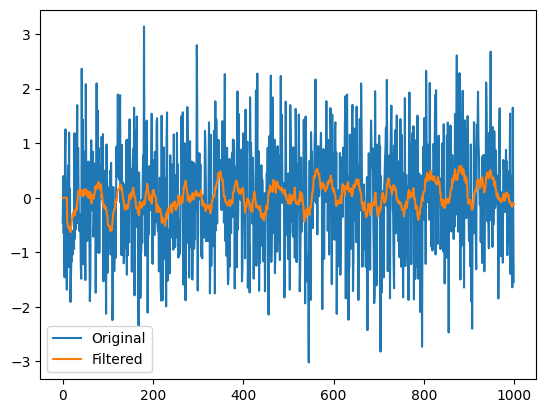

In [29]:
import numpy as np

sensor_readings = np.random.randn(1000)

# Add noise to the dataset
sensor_readings += np.random.randn(1000) * 0.1

# Create a low-pass filter
def low_pass_filter(data, cutoff_frequency):
    """
    Filters high-frequency noise from the data.

    Args:
        data: A numpy array of sensor readings.
        cutoff_frequency: The cutoff frequency of the filter.

    Returns:
        A numpy array of filtered sensor readings.
    """

    filtered_data = np.zeros(len(data))
    for i in range(len(data)):
        filtered_data[i] = np.sum(data[i - cutoff_frequency:i + cutoff_frequency + 1]) / (2 * cutoff_frequency + 1)
    return filtered_data

# Filter the data using the low-pass filter
filtered_sensor_readings = low_pass_filter(sensor_readings, 10)

# Plot the original and filtered sensor readings
import matplotlib.pyplot as plt

plt.plot(sensor_readings, label="Original")
plt.plot(filtered_sensor_readings, label="Filtered")
plt.legend()
plt.show()


In [2]:
sensor_readings

array([ 4.75904768e-01, -1.70214891e+00,  3.25602661e-01, -6.01260795e-01,
        1.43093144e+00, -8.79690059e-01, -5.28952692e-01, -9.63770378e-01,
       -1.12519878e+00, -4.83385182e-01, -2.36120773e+00, -1.92362766e-01,
        1.01950558e+00,  1.19182712e+00,  1.19687288e+00, -1.45961235e-01,
        9.09278095e-01,  1.65453621e+00, -9.96357848e-02, -1.92028404e+00,
       -7.78709581e-01,  3.58511639e-01,  3.66257110e-01, -1.45805504e+00,
       -1.75580969e+00, -2.15896709e-01, -8.37487766e-01,  3.44593740e-02,
        1.25650140e-01,  5.56262453e-02,  7.14157770e-01, -2.19312576e+00,
       -3.53726030e-01, -2.06080392e+00, -5.59929100e-02, -3.49765129e-01,
        1.08106491e+00, -5.81855419e-01, -1.34481933e+00, -9.96931119e-02,
       -1.22318903e-01,  4.34216751e-01, -3.17171290e-02,  1.94990257e-01,
        1.04813118e+00, -3.24961038e-01, -1.87424100e+00, -2.60754719e-02,
        4.49758718e-01, -9.13682351e-01,  3.03197281e-01,  7.19872774e-01,
        2.04795882e-01,  

### Binning

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models.

Data binning is a type of data preprocessing, a mechanism which includes also dealing with missing values, formatting, normalization and standardization.

Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.

1. convert numeric to categorical includes binning by distance and binning by frequency
2. reduce numeric values includes quantisation (or sampling).

Binning is a technique for data smoothing. Data smoothing is employed to remove noise from data. Three techniques for data smoothing:

1. binning
2. regression
3. outlier analysis


In [24]:
import pandas as pd
df = pd.read_csv('cupcake.csv')
df.head(5)

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5


#### Binning by distance

In this case we define the edges of each bin. We group values related to the column Cupcake into three groups: small, medium and big. In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group. We exploit the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column Cupcake.

In [25]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

4
100


In [26]:
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([  4.,  36.,  68., 100.])

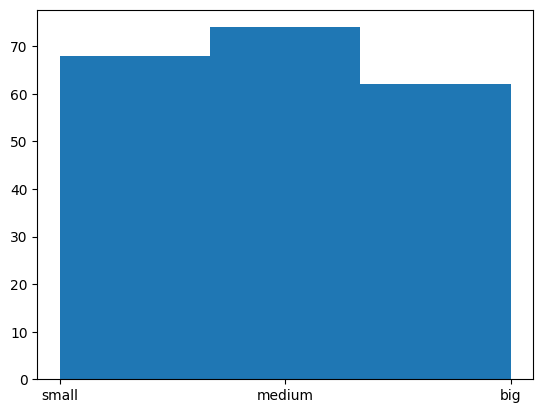

In [30]:
labels = ['small', 'medium', 'big']
df['bin_cut_linspace'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)
plt.hist(df['bin_cut_linspace'], bins=3)
plt.show()

#### We can define bins manually as well

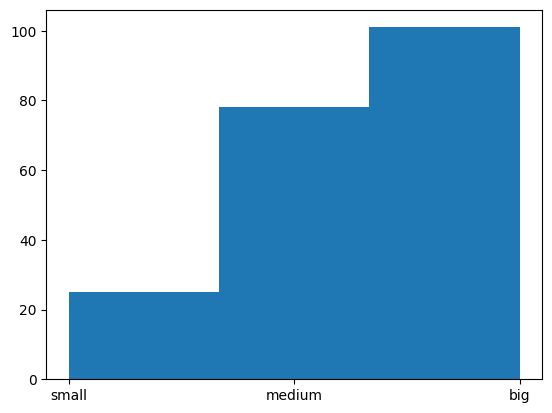

In [34]:

bins = [ 0, 10, 50, 100 ]
df['bin_cut_manual'] = pd.cut(df['Cupcake'] , bins=bins, labels=labels, include_lowest=True)

plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

In [35]:
df

,Mese,Cupcake,bin_cut_linspace,bin_cut_manual
0,2004-01,5,small,small
1,2004-02,5,small,small
2,2004-03,4,small,small
3,2004-04,6,small,small
4,2004-05,5,small,small
...,...,...,...,...
199,2020-08,47,medium,medium
200,2020-09,44,medium,medium
201,2020-10,49,medium,medium
202,2020-11,44,medium,medium


#### How to handle nan value

To deal with NaN values we can use dropna() function to remove these values from our dataset

In [3]:
import pandas as pd
import numpy as np

In [12]:
df = pd.DataFrame({"x": np.random.randint(1, 100, 300),
                  "y": np.random.normal(-2,2, 300)})
df['x'] = df['x'].sample(frac=0.3)

df

,x,y
0,NaN,-0.892951
1,NaN,0.379144
2,NaN,-3.701127
3,NaN,-3.065916
4,52.0,-2.009466
...,...,...
295,95.0,2.771746
296,NaN,-1.989901
297,NaN,-2.870928
298,NaN,-3.593104


In [13]:
df.dropna(how='any')

,x,y
4,52.0,-2.009466
5,18.0,-1.710311
7,23.0,-1.768980
8,16.0,-0.931879
9,50.0,0.622874
...,...,...
284,86.0,3.218881
286,39.0,-4.418578
290,60.0,-0.137188
292,37.0,-2.134600
